<a href="https://colab.research.google.com/github/justinwickelgren/data-science-class/blob/main/Unit_7_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

You would want to use a polynomial in your model to capture increased complexity. A linear model cannot capture as much complexity in the relationship between data as a polynomial model can.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

You would not want to include a polynomial element in a model if it does not improve the model's predictions. Polynomials, especially of higher degrees, can cause overfitting and become poor at making actual predictions. Therefore, they should only be used if they make a meaningful improvement in the model.

**Task3**:

What's the point of using b splines?

B splines allow the model to capture of the complexity of a polynomial with less overfitting. By splitting the data up into segments, they can capture different patterns in different parts of the data without increasing the degree of the polynomial.

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

A Gaussian Process is a distribution over functions (i.e. it is a probability distribution that assigns probabilities to an infinite set of possible functions for modeling the data). This allows it to not assume that the data follows a specific functions, like a linear regression, but allow for uncertainty in the function that the data matches. The Gaussian Process then updates this distribution as it receives data to get closer to the actual function that models the data.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [1]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-kn85mxbr
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-kn85mxbr
  Resolved https://github.com/pydata/xarray.git to commit 0caf09628011f9790d6e8df62fe92c485c7382ae
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev17+g0caf0962-py3-none-any.whl size=1260150 sha256=b4833209329847f7bab223dbf9dae5dc372ae2f67bd20c416606a5c814e28366
  Stored in directory: /tmp/pip-ephem-wheel-cache-yl438om8/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.7 MB/s eta 0:00:00
   ━

In [2]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

In [4]:
howell = pd.read_csv("https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv")

In [5]:
model_poly_3 = bmb.Model("weight ~ poly(height, degree=3)", howell, family="negativebinomial")
idata_poly_3 = model_poly_3.fit()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


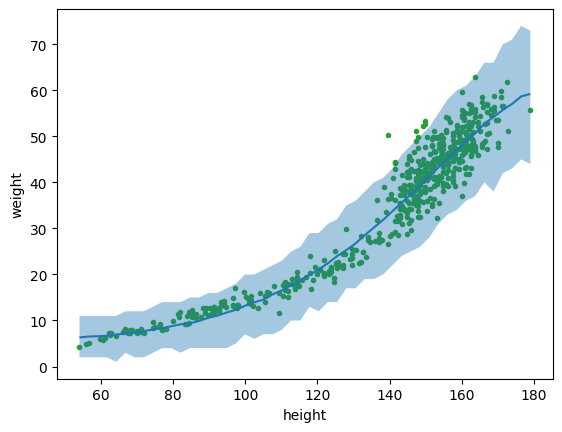

In [6]:
bmb.interpret.plot_predictions(model_poly_3, idata_poly_3, "height", pps=True)
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned that if you do not specify a mean function for a GP, the model assumes a mean of 0 (i.e. the data will be centered around 0).

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

My favorite graph is the final prediction graph that shows the ice core data being mostly flat and then increasing at the industrial revolution. It then shows the predictions for the future where the amount of CO<sub>2</sub> will continue increasing, but at various possible rates. This is my favorite graph because it matches quite well with what has actually happened since 1958 and it shows the power of the model when it is executed well.